In [1]:
!pip3 install matplotlib
!pip3 install scipy
!pip3 install sklearn

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn                        import metrics, svm
from sklearn.linear_model           import LinearRegression
from sklearn.linear_model           import LogisticRegression
from sklearn.tree                   import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors              import KNeighborsClassifier, KNeighborsRegressor
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.neural_network         import MLPRegressor
from sklearn.svm                    import SVC
from sklearn.metrics                import mean_squared_error
from sklearn.metrics                import r2_score
from sklearn.model_selection        import train_test_split
from sklearn.cluster                import KMeans
from sklearn.ensemble               import IsolationForest, RandomForestRegressor
from sklearn                        import tree
import warnings
warnings.filterwarnings('ignore')

## Task 5

Your team are required to complete the following tasks on this Jupyter notebook. 

1. step 1: read training data from csv
2. step 2: check our dataset for outliers and clean them
3. step 3: Feature Engineering & Knowledge Discovery
4. step 4: predict data

### step 1: read training data from csv

In [146]:
df = pd.read_csv('training.csv', sep=',', parse_dates=['trip_start_timestamp'])
df.head(10)

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,payment_type,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,2302,2016-01-01,2016-01-01 00:15:00,1080.0,0.0,12.25,0.00,0.0,0.0,12.25,Cash,173.0,203.0,109.0,708.0
1,4196,2016-01-01,2016-01-01 00:00:00,60.0,0.0,3.85,0.00,0.0,0.0,3.85,Cash,170.0,351.0,170.0,351.0
2,6847,2016-01-01,2016-01-01 00:15:00,780.0,5.1,13.45,0.00,0.0,1.0,14.45,Cash,754.0,410.0,423.0,586.0
3,8753,2016-01-01,2016-01-01 00:00:00,420.0,0.1,6.85,3.00,0.0,1.0,10.85,Credit Card,604.0,668.0,604.0,668.0
4,1283,2016-01-01,2016-01-01 00:00:00,300.0,0.5,6.25,0.00,0.0,1.0,7.25,No Charge,744.0,605.0,30.0,405.0
5,4120,2016-01-01,2016-01-01 00:15:00,480.0,2.7,8.85,2.00,0.0,0.0,10.85,Credit Card,18.0,610.0,97.0,244.0
6,7694,2016-01-01,2016-01-01 00:00:00,0.0,0.0,10.45,2.09,0.0,0.0,12.54,Credit Card,NaN,NaN,NaN,NaN
7,8096,2016-01-01,2016-01-01 00:00:00,300.0,2.1,6.85,0.00,0.0,0.0,6.85,Cash,NaN,NaN,NaN,NaN
8,4728,2016-01-01,2016-01-01 00:30:00,1260.0,7.2,21.75,0.00,0.0,1.0,22.75,Cash,385.0,478.0,109.0,708.0
9,7042,2016-01-01,2016-01-01 00:00:00,720.0,1.6,8.05,0.00,0.0,0.0,8.05,Cash,294.0,113.0,395.0,408.0


In [147]:
df_5_1_test = pd.read_csv('5_1_testing.csv', sep=',', parse_dates=['trip_start_timestamp'])

### step 2: check our dataset for outliers and clean them

In [148]:
#get statistic information df_statistic
df.describe()

,taxi_id,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,1.705782e+06,1.705468e+06,1.705768e+06,1.705749e+06,1.705749e+06,1.705749e+06,1.705749e+06,1.705749e+06,1.420042e+06,1.420042e+06,1.394117e+06,1.394117e+06
mean,4.389323e+03,6.534228e+02,2.872740e+00,1.315372e+01,1.515116e+00,4.308260e-03,9.484969e-01,1.562167e+01,3.921430e+02,4.377739e+02,4.013048e+02,4.388510e+02
std,2.515819e+03,9.325519e+02,1.810805e+01,3.287412e+01,2.744966e+00,8.363677e-01,2.559622e+01,4.272213e+01,2.527695e+02,1.948890e+02,2.544152e+02,2.023005e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2.242000e+03,2.400000e+02,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,1.700000e+02,2.880000e+02,1.730000e+02,2.700000e+02
50%,4.386000e+03,4.800000e+02,1.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.500000e+00,3.990000e+02,4.780000e+02,4.110000e+02,4.780000e+02
75%,6.591000e+03,8.400000e+02,2.400000e+00,1.350000e+01,2.000000e+00,0.000000e+00,1.000000e+00,1.530000e+01,6.180000e+02,6.100000e+02,6.660000e+02,6.100000e+02
max,8.762000e+03,8.634000e+04,3.280000e+03,9.002290e+03,4.500000e+02,9.999900e+02,9.993410e+03,9.997160e+03,7.840000e+02,7.850000e+02,7.840000e+02,7.850000e+02


In [149]:
# check datatypes
df.dtypes

taxi_id                          int64
trip_start_timestamp    datetime64[ns]
trip_end_timestamp              object
trip_seconds                   float64
trip_miles                     float64
fare                           float64
tips                           float64
tolls                          float64
extras                         float64
trip_total                     float64
payment_type                    object
pickup_latitude                float64
pickup_longitude               float64
dropoff_latitude               float64
dropoff_longitude              float64
dtype: object

In [150]:
df = df.drop(df[(np.isnan(df['pickup_latitude']) |
                 np.isnan(df['pickup_longitude']) | 
                 np.isnan(df['dropoff_latitude']) |
                 np.isnan(df['dropoff_longitude']) | 
                 np.isnan(df['fare']) | 
                 np.isnan(df['tips']))].index).reset_index(drop=True)
df = df.drop(df[(df['trip_seconds'] == 0) | (df['trip_miles'] == 0)].index).reset_index(drop=True)

In [151]:
# check the percentage of fare > 100 
len(df[df['fare'] > 100])/len(df)

0.00022541798542297027

In [152]:
# cause the percentage is less than 1%, so remove df['fare']>100
print('Old size: %d' % len(df))
df = df.drop(df[(df['fare'] > 100) | (df['fare'] < 3.25)].index).reset_index(drop=True)
print('New size: %d' % len(df))

Old size: 1091306
New size: 1090953


In [153]:
# remove pickup position is same as dropoff position
print(len(df))
df= df.drop(df[(df['pickup_latitude'] == df['dropoff_latitude']) & (df['pickup_longitude'] == df['dropoff_longitude'])].index).reset_index(drop=True)
print(len(df))

1090953
992011


### step 3: feature engineering & discover the relationship between features

In [154]:
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'], errors='coerce')
df['trip_end_timestamp'] = pd.to_datetime(df['trip_end_timestamp'], errors='coerce')

df['weekday'] = df.trip_start_timestamp.apply(lambda t: t.weekday())
df['hour'] = df.trip_start_timestamp.apply(lambda t: t.hour)

In [1]:
df_true = pd.read_csv('5_1_groundtruth.csv', sep=',', parse_dates=['trip_start_timestamp'])
df_true.head(10)

NameError: name 'pd' is not defined

## solution 1
### use decision tree to predict value

In [13]:
df.shape

(992011, 17)

In [14]:
pickup_positions = df[['pickup_latitude', 'pickup_longitude']].to_numpy()
fare = df['fare'].to_numpy()
tips = df['tips'].to_numpy()

In [15]:
pickup_positions_train, pickup_positions_test, fare_train, fare_test, tips_train, tips_test = train_test_split(pickup_positions, fare, tips, test_size=0.1)

In [16]:
x_train = pickup_positions_train[:]
y_train = fare_train[:]
z_train = tips_train[:]
x_test = pickup_positions_test[:]
y_test = fare_test[:]
z_test = tips_test[:]

In [17]:
fn = DecisionTreeRegressor()

print('fare')
fn.fit(x_train, y_train)
y_predict = fn.predict(x_test)
fare_rmse = math.sqrt(mean_squared_error(y_test, y_predict))
fare_r2 = r2_score(y_test, y_predict, multioutput='variance_weighted')
print('RMSE: ', fare_rmse)
print('r2 score', fare_r2)

print('tips')
fn.fit(x_train, z_train)
z_predict = fn.predict(x_test)
tips_rmse = math.sqrt(mean_squared_error(z_test, z_predict))
tips_r2 = r2_score(z_test, z_predict, multioutput='variance_weighted')
print('RMSE: ', tips_rmse)
print('r2 score', tips_r2)

fare
RMSE:  7.930015909372408
r2 score 0.49938896207783995
tips
RMSE:  2.149171812074116
r2 score 0.25963590035715534


In [18]:
s1_df_test = df_5_1_test[:]

In [19]:
def predict_fare():
    fn = DecisionTreeRegressor()
    fn.fit(x_train, y_train)
    order1_predict = fn.predict(s1_df_test.loc[:,['order1_pickup_longitude', 'order1_pickup_latitude']])
    order2_predict = fn.predict(s1_df_test.loc[:,['order2_pickup_longitude', 'order2_pickup_latitude']])
    order3_predict = fn.predict(s1_df_test.loc[:,['order3_pickup_longitude', 'order3_pickup_latitude']])
    s1_df_test['order1_fare'] = order1_predict
    s1_df_test['order2_fare'] = order2_predict
    s1_df_test['order3_fare'] = order3_predict

In [20]:
def predict_tips():
    fn = DecisionTreeRegressor()
    fn.fit(x_train, z_train)
    order1_predict = fn.predict(s1_df_test.loc[:,['order1_pickup_longitude', 'order1_pickup_latitude']])
    order2_predict = fn.predict(s1_df_test.loc[:,['order2_pickup_longitude', 'order2_pickup_latitude']])
    order3_predict = fn.predict(s1_df_test.loc[:,['order3_pickup_longitude', 'order3_pickup_latitude']])
    s1_df_test['order1_tips'] = order1_predict
    s1_df_test['order2_tips'] = order2_predict
    s1_df_test['order3_tips'] = order3_predict

In [21]:
def choose_best():
    for index, row in s1_df_test.iterrows():
        total1 = row['order1_fare'] + row['order1_tips']
        total2 = row['order2_fare'] + row['order2_tips']
        total3 = row['order3_fare'] + row['order3_tips']
        order_total = [total1, total2, total3]
        max_total = np.argmax(order_total) + 1
        s1_df_test.iloc[index,13]= int(max_total)

In [22]:
predict_fare()
predict_tips()
choose_best()

In [23]:
s1_df_test.to_csv('s1_5_1_output.csv', mode='w+', index=False,header=True)

In [26]:
s1_df_test.best

0      3
1      2
2      1
3      2
4      1
      ..
145    2
146    1
147    2
148    2
149    3
Name: best, Length: 150, dtype: int64

In [27]:
df_true.best

0      2
1      3
2      2
3      1
4      1
      ..
145    1
146    1
147    1
148    1
149    2
Name: best, Length: 150, dtype: int64

In [31]:
idx=(s1_df_test.best==df_true.best)
print('the accuracy is  ',len(s1_df_test[idx])/len(s1_df_test)* 100,'%')

the accuracy is   28.000000000000004 %


## solution 2
### use kmeans to classify pickup_location and adapt the average of each cluster to be predicted value

In [32]:
s2_df_test = df_5_1_test[:]

In [33]:
order_5_1_time = s2_df_test['trip_start_timestamp'].unique()
order_5_1_time

array(['2016-02-01T08:00:00.000000000'], dtype='datetime64[ns]')

In [34]:
df_s2 = df[df['trip_start_timestamp'].map(lambda x: (x.time() == pd.Timestamp(order_5_1_time[0]).time())\
                                        & (x.dayofweek == pd.Timestamp(order_5_1_time[0]).dayofweek))]

In [35]:
pre_data = df_s2.loc[:,['pickup_latitude', 'pickup_longitude','fare','tips']].copy()


pre_data = pre_data.sample(frac=1.0)
cut_idx = int(round(0.1 * pre_data.shape[0]))
data_test, data_train = pre_data.iloc[:cut_idx].copy(), pre_data.iloc[cut_idx:].copy()
print (pre_data.shape, data_test.shape, data_train.shape)

(1371, 4) (137, 4) (1234, 4)


In [36]:
df_kmeans =  data_train.loc[:,['pickup_longitude', 'pickup_latitude']]

NUM_CLUSTER=88

kmeans = KMeans(n_clusters=NUM_CLUSTER)
kmeans.fit(df_kmeans)
labels = kmeans.predict(df_kmeans)
centroids = kmeans.cluster_centers_

data_train['cluster_labels']=labels

In [37]:
df_cluster_mean = [None]*NUM_CLUSTER
df_cluster_mean_tips = [None]*NUM_CLUSTER
for i in range(NUM_CLUSTER):
    df_cluster_mean[i] = data_train[data_train['cluster_labels'].map(lambda x: x == i)]['fare'].mean()
    df_cluster_mean_tips[i] = data_train[data_train['cluster_labels'].map(lambda x: x == i)]['tips'].mean()

In [38]:
data_train['predict']=data_train['cluster_labels'].apply(lambda x: df_cluster_mean[x])
data_train['predict_tips']=data_train['cluster_labels'].apply(lambda x: df_cluster_mean_tips[x])

In [39]:
df_kmeans_test = data_test.loc[:,['pickup_longitude', 'pickup_latitude']]
labels_test = kmeans.predict(df_kmeans_test)

data_test['cluster_labels']=labels_test

In [40]:
data_test['predict']=data_test['cluster_labels'].apply(lambda x: df_cluster_mean[x])
data_test['predict_tips']=data_test['cluster_labels'].apply(lambda x: df_cluster_mean_tips[x])

In [41]:
data_train

,pickup_latitude,pickup_longitude,fare,tips,cluster_labels,predict,predict_tips
300156,130.0,532.0,8.25,0.00,4,7.934091,0.761364
91745,166.0,725.0,17.25,0.00,78,17.250000,0.000000
91751,395.0,408.0,5.50,3.00,5,6.911505,0.913978
772557,173.0,203.0,39.75,7.95,2,16.184722,1.252778
772417,686.0,500.0,17.25,0.00,3,19.503390,1.421356
...,...,...,...,...,...,...,...
300011,686.0,500.0,13.00,0.00,3,19.503390,1.421356
542465,411.0,545.0,5.25,2.00,0,7.085106,0.617021
772409,767.0,733.0,7.00,0.00,18,7.384615,0.653846
91814,411.0,545.0,7.85,2.00,0,7.085106,0.617021


In [42]:
data_test

,pickup_latitude,pickup_longitude,fare,tips,cluster_labels,predict,predict_tips
91934,395.0,408.0,11.25,1.95,5,6.911505,0.913978
300312,695.0,366.0,7.25,0.00,21,9.072917,0.874583
772725,744.0,605.0,6.00,1.00,7,8.334889,0.857000
91706,419.0,615.0,6.25,0.00,23,10.220000,1.042857
772645,210.0,470.0,6.25,0.00,12,15.785000,2.255000
...,...,...,...,...,...,...,...
91772,395.0,408.0,5.65,0.06,5,6.911505,0.913978
300176,411.0,545.0,5.50,0.00,0,7.085106,0.617021
300329,474.0,204.0,7.75,0.00,10,12.168750,1.387500
772639,647.0,48.0,6.75,0.00,14,16.900000,0.971739


In [43]:
#fare on training set
test = data_train['fare'].to_numpy()
predict = data_train['predict'].to_numpy()
fare_rmse = math.sqrt(mean_squared_error(test, predict))
fare_r2 = r2_score(test, predict, multioutput='variance_weighted')
print(fare_rmse)
print(fare_r2)

8.1852629516612
0.4932360518718514


In [44]:
#fare on testing set
test = data_test['fare'].to_numpy()
predict = data_test['predict'].to_numpy()
fare_rmse = math.sqrt(mean_squared_error(test, predict))
fare_r2 = r2_score(test, predict, multioutput='variance_weighted')
print(fare_rmse)
print(fare_r2)

11.205961459927748
0.2195029470544988


In [45]:
#tips on training set
test = data_train['tips'].to_numpy()
predict = data_train['predict_tips'].to_numpy()
tips_rmse = math.sqrt(mean_squared_error(test, predict))
tips_r2 = r2_score(test, predict, multioutput='variance_weighted')
print(tips_rmse)
print(tips_r2)

1.9396012492524355
0.4083425541547314


In [46]:
#tips on testing set
test = data_test['tips'].to_numpy()
predict = data_test['predict_tips'].to_numpy()
tips_rmse = math.sqrt(mean_squared_error(test, predict))
tips_r2 = r2_score(test, predict, multioutput='variance_weighted')
print(tips_rmse)
print(tips_r2)

2.253858724258312
0.19186809701235621


In [47]:
df_kmeans_output2 = s2_df_test.loc[:,['order2_pickup_longitude', 'order2_pickup_latitude']]
labels_output2 = kmeans.predict(df_kmeans_output2)

s2_df_test['cluster_labels2']=labels_output2

s2_df_test['order2_fare']=s2_df_test['cluster_labels2'].apply(lambda x: df_cluster_mean[x])
s2_df_test['order2_tips']=s2_df_test['cluster_labels2'].apply(lambda x: df_cluster_mean_tips[x])

s2_df_test = s2_df_test.drop(['cluster_labels2'], axis=1)

In [48]:
df_kmeans_output3 = s2_df_test.loc[:,['order3_pickup_longitude', 'order3_pickup_latitude']]
labels_output3 = kmeans.predict(df_kmeans_output3)

s2_df_test['cluster_labels3']=labels_output3

s2_df_test['order3_fare']=s2_df_test['cluster_labels3'].apply(lambda x: df_cluster_mean[x])
s2_df_test['order3_tips']=s2_df_test['cluster_labels3'].apply(lambda x: df_cluster_mean_tips[x])

s2_df_test = s2_df_test.drop(['cluster_labels3'], axis=1)

In [49]:
def best(t1, t2, t3):
    if t1 > t2 and t1 > t3:
        return 1
    elif t2 > t3:
        return 2
    else:
        return 3
s2_df_test['best'] = np.vectorize(best)(
                    s2_df_test['order1_fare']+s2_df_test['order1_tips'],
                    s2_df_test['order2_fare']+s2_df_test['order2_tips'], 
                    s2_df_test['order3_fare']+s2_df_test['order3_tips'])

In [50]:
s2_df_test.to_csv('s2_5_1_output.csv',mode='w', index=False)
s2_df_test

,order1_pickup_latitude,order1_pickup_longitude,order2_pickup_latitude,order2_pickup_longitude,order3_pickup_latitude,order3_pickup_longitude,trip_start_timestamp,order1_fare,order1_tips,order2_fare,order2_tips,order3_fare,order3_tips,best
0,175.0,675.0,660.0,120.0,130.0,532.0,2016-02-01 08:00:00,0,0,16.900000,0.971739,7.934091,0.761364,2
1,686.0,500.0,37.0,370.0,688.0,206.0,2016-02-01 08:00:00,0,0,7.250000,2.000000,11.538378,1.377027,3
2,173.0,203.0,779.0,81.0,744.0,605.0,2016-02-01 08:00:00,0,0,19.291667,0.333333,8.334889,0.857000,2
3,660.0,120.0,419.0,615.0,175.0,675.0,2016-02-01 08:00:00,0,0,10.220000,1.042857,24.583333,7.661667,3
4,167.0,754.0,395.0,408.0,744.0,605.0,2016-02-01 08:00:00,0,0,6.911505,0.913978,8.334889,0.857000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,470.0,676.0,411.0,545.0,695.0,366.0,2016-02-01 08:00:00,0,0,7.085106,0.617021,9.072917,0.874583,3
146,686.0,500.0,18.0,610.0,158.0,270.0,2016-02-01 08:00:00,0,0,7.177358,0.590755,13.124000,0.438000,3
147,599.0,346.0,64.0,231.0,744.0,605.0,2016-02-01 08:00:00,0,0,8.750000,0.630769,8.334889,0.857000,2
148,700.0,659.0,411.0,545.0,130.0,532.0,2016-02-01 08:00:00,0,0,7.085106,0.617021,7.934091,0.761364,3


In [52]:
idx=(s2_df_test.best==df_true.best)
print('the accuracy is  ',len(s2_df_test[idx])/len(s1_df_test)* 100,'%')

the accuracy is   45.33333333333333 %


### solution3 - use lightgbm

In [80]:
import lightgbm as lgbm
import gc

In [81]:
df_5_1_test = pd.read_csv('5_1_testing.csv', sep=',', parse_dates=['trip_start_timestamp'])

In [82]:
df.shape

(992011, 17)

In [83]:
y = df[['fare']]
X = df.loc[:,['pickup_latitude','pickup_longitude','weekday','hour']]

In [84]:
y1=df[['tips']]
X1= df.loc[:,['pickup_latitude','pickup_longitude','weekday','hour']]

In [86]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaler = scaler.fit(X)
print("max:{}, min:{}".format(scaler.data_max_, scaler.data_min_))
X_mms= scaler.transform(X)

max:[784. 785.   6.  23.], min:[0. 1. 0. 0.]


In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X1_scaler = scaler.fit(X1)
print("max:{}, min:{}".format(scaler.data_max_, scaler.data_min_))
X1_mms= scaler.transform(X1)

max:[784. 785.   6.  23.], min:[0. 1. 0. 0.]


In [88]:
x_train,x_test,y_train,y_test = train_test_split(X_mms,y,random_state=42,test_size=0.30)

gc.collect()

params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': 4,
        'num_leaves': 31,
        'learning_rate': 0.03,
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': True,
        'seed':0,
        'num_rounds':50000
    }
train_set = lgbm.Dataset(x_train, y_train, silent=False)
valid_set = lgbm.Dataset(x_test, y_test, silent=False)
model = lgbm.train(params, train_set = train_set, num_boost_round=500,early_stopping_rounds=500,verbose_eval=500, valid_sets=valid_set)
gc.collect()

Training until validation scores don't improve for 500 rounds
[500]	valid_0's rmse: 7.75559
[1000]	valid_0's rmse: 7.74506
[1500]	valid_0's rmse: 7.74108
[2000]	valid_0's rmse: 7.73999
[2500]	valid_0's rmse: 7.73922
Early stopping, best iteration is:
[2363]	valid_0's rmse: 7.73909


360

In [89]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X1_mms,y1,random_state=42,test_size=0.30)

gc.collect()

params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': 4,
        'num_leaves': 31,
        'learning_rate': 0.03,
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': True,
        'seed':0,
        'num_rounds':50000
    }
train_set = lgbm.Dataset(x1_train, y1_train, silent=False)
valid_set = lgbm.Dataset(x1_test, y1_test, silent=False)
model_1 = lgbm.train(params, train_set = train_set, num_boost_round=500,early_stopping_rounds=500,verbose_eval=500, valid_sets=valid_set)
gc.collect()

Training until validation scores don't improve for 500 rounds
[500]	valid_0's rmse: 2.14786
[1000]	valid_0's rmse: 2.14745
Early stopping, best iteration is:
[701]	valid_0's rmse: 2.14745


66

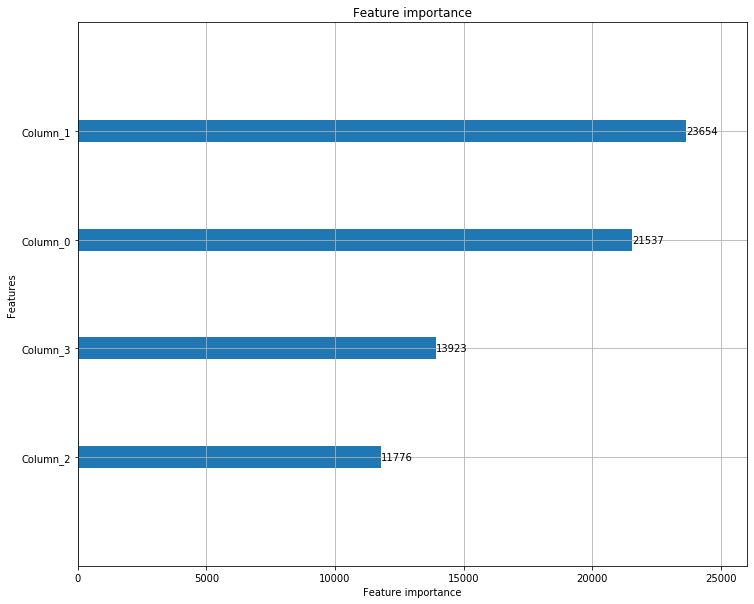

In [90]:
lgbm.plot_importance(model, figsize=(12, 10))

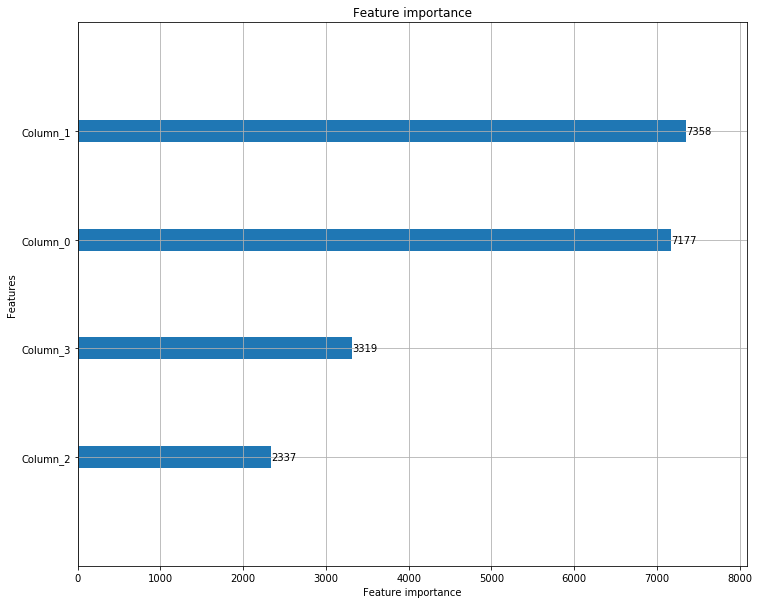

In [91]:
lgbm.plot_importance(model_1, figsize=(12, 10))

In [92]:
submission = model.predict(x_test)
submission

array([ 8.86761414, 12.27373914,  8.95465728, ...,  8.2670705 ,
        7.90532128, 21.29557287])

In [93]:
submission_1 = model_1.predict(x1_test)
submission_1

array([1.06380928, 1.45884699, 1.20204823, ..., 0.85580085, 1.13892974,
       2.44944306])

In [94]:
#fare
r2_score(y_test, submission,multioutput='variance_weighted') 

0.5250445117502027

In [95]:
#tips
r2_score(y1_test, submission_1,multioutput='variance_weighted')

0.2771762407564743

In [96]:
s3_df_test = df_5_1_test[:]

In [97]:
s3_df_test['trip_start_timestamp'] = pd.to_datetime(s3_df_test['trip_start_timestamp'], errors='coerce')

s3_df_test['weekday'] = s3_df_test.trip_start_timestamp.apply(lambda t: t.weekday())
s3_df_test['hour'] = s3_df_test.trip_start_timestamp.apply(lambda t: t.hour)

s3_df_test.describe()

,order1_pickup_latitude,order1_pickup_longitude,order2_pickup_latitude,order2_pickup_longitude,order3_pickup_latitude,order3_pickup_longitude,order1_fare,order1_tips,order2_fare,order2_tips,order3_fare,order3_tips,best,weekday,hour
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,150.0
mean,430.846667,451.733333,407.653333,445.033333,434.846667,424.626667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
std,237.839541,210.542593,230.182682,194.675756,246.218971,199.639324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,18.000000,6.000000,18.000000,6.000000,18.000000,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
25%,212.000000,302.500000,210.000000,346.000000,199.000000,249.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
50%,411.000000,500.000000,411.000000,500.000000,411.000000,470.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
75%,675.750000,610.000000,599.000000,605.000000,687.500000,605.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
max,767.000000,780.000000,779.000000,781.000000,779.000000,781.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [106]:
order1_test = s3_df_test.loc[:,['order1_pickup_latitude','order1_pickup_longitude','weekday','hour']]
order2_test = s3_df_test.loc[:,['order2_pickup_latitude','order2_pickup_longitude','weekday','hour']]
order3_test = s3_df_test.loc[:,['order3_pickup_latitude','order3_pickup_longitude','weekday','hour']]

In [107]:
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
scaler3 = MinMaxScaler()
order1_scaler = scaler1.fit(order1_test)
order2_scaler = scaler2.fit(order2_test)
order3_scaler = scaler3.fit(order3_test)
#print("max:{}, min:{}".format(scaler.data_max_, scaler.data_min_))
order1_mms= scaler1.transform(order1_test)
order2_mms= scaler2.transform(order2_test)
order3_mms= scaler3.transform(order3_test)

In [105]:
s3_df_test.loc[:,['order2_pickup_latitude','order2_pickup_longitude','weekday','hour']]
order1_predict = model.predict(x_test)
order1_predict

array([ 8.86761414, 12.27373914,  8.95465728, ...,  8.2670705 ,
        7.90532128, 21.29557287])

In [110]:
def predict_fare_3():
    
    order1_predict = model.predict(order1_mms)
    order2_predict = model.predict(order2_mms)
    order3_predict = model.predict(order3_mms)
    s3_df_test.loc[:,'order1_fare'] = order1_predict
    s3_df_test['order2_fare'] = order2_predict
    s3_df_test['order3_fare'] = order3_predict
    

In [111]:
predict_fare_3()
s3_df_test.head(5)

,order1_pickup_latitude,order1_pickup_longitude,order2_pickup_latitude,order2_pickup_longitude,order3_pickup_latitude,order3_pickup_longitude,trip_start_timestamp,order1_fare,order1_tips,order2_fare,order2_tips,order3_fare,order3_tips,best,weekday,hour
0,175.0,675.0,660.0,120.0,130.0,532.0,2016-02-01 08:00:00,15.165314,0,13.881406,0,16.612045,0,0,0,8
1,686.0,500.0,37.0,370.0,688.0,206.0,2016-02-01 08:00:00,13.493156,0,17.246681,0,13.492545,0,0,0,8
2,173.0,203.0,779.0,81.0,744.0,605.0,2016-02-01 08:00:00,31.218733,0,12.044427,0,10.962721,0,0,0,8
3,660.0,120.0,419.0,615.0,175.0,675.0,2016-02-01 08:00:00,15.174368,0,10.328450,0,16.169871,0,0,0,8
4,167.0,754.0,395.0,408.0,744.0,605.0,2016-02-01 08:00:00,12.496551,0,8.285999,0,10.962721,0,0,0,8


In [112]:
def predict_tips_3():
    
    order1_predict = model_1.predict(order1_mms)
    order2_predict = model_1.predict(order2_mms)
    order3_predict = model_1.predict(order3_mms)
    s3_df_test['order1_tips'] = order1_predict
    s3_df_test['order2_tips'] = order2_predict
    s3_df_test['order3_tips'] = order3_predict

In [113]:
def choose_best_3():
    for index, row in s3_df_test.iterrows():
        total1 = row['order1_fare'] + row['order1_tips']
        total2 = row['order2_fare'] + row['order2_tips']
        total3 = row['order3_fare'] + row['order3_tips']
        order_total = [total1, total2, total3]
        max_total = np.argmax(order_total) + 1
        s3_df_test.iloc[index,13]= int(max_total)

In [114]:
predict_fare_3()
predict_tips_3()
choose_best_3()

In [119]:
s3_df_test.to_csv('s3_5_1_output.csv', mode='w+', index=False,header=True)

In [120]:
s3_df_test

,order1_pickup_latitude,order1_pickup_longitude,order2_pickup_latitude,order2_pickup_longitude,order3_pickup_latitude,order3_pickup_longitude,trip_start_timestamp,order1_fare,order1_tips,order2_fare,order2_tips,order3_fare,order3_tips,best,weekday,hour
0,175.0,675.0,660.0,120.0,130.0,532.0,2016-02-01 08:00:00,15.165314,0.638221,13.881406,0.807370,16.612045,0.996408,3,0,8
1,686.0,500.0,37.0,370.0,688.0,206.0,2016-02-01 08:00:00,13.493156,0.694258,17.246681,0.870369,13.492545,0.932346,2,0,8
2,173.0,203.0,779.0,81.0,744.0,605.0,2016-02-01 08:00:00,31.218733,2.485588,12.044427,0.648696,10.962721,1.117639,1,0,8
3,660.0,120.0,419.0,615.0,175.0,675.0,2016-02-01 08:00:00,15.174368,0.835575,10.328450,1.191541,16.169871,0.944191,3,0,8
4,167.0,754.0,395.0,408.0,744.0,605.0,2016-02-01 08:00:00,12.496551,0.853907,8.285999,1.026610,10.962721,1.117639,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,470.0,676.0,411.0,545.0,695.0,366.0,2016-02-01 08:00:00,12.756398,0.595852,21.886897,2.364175,6.653020,0.877610,2,0,8
146,686.0,500.0,18.0,610.0,158.0,270.0,2016-02-01 08:00:00,13.493156,0.694258,13.122648,0.426096,19.938469,1.413702,3,0,8
147,599.0,346.0,64.0,231.0,744.0,605.0,2016-02-01 08:00:00,16.277143,1.089693,9.745376,0.990025,10.962721,1.117639,1,0,8
148,700.0,659.0,411.0,545.0,130.0,532.0,2016-02-01 08:00:00,25.690496,0.950578,21.886897,2.364175,16.612045,0.996408,1,0,8


In [121]:
idx=(s3_df_test.best==df_true.best)
print('the accuracy is  ',len(s3_df_test[idx])/len(s1_df_test)* 100,'%')

the accuracy is   31.333333333333336 %


In [210]:
idx = (df['weekday']==0)&(df['hour']==8)
taxiDB_5_1 = df[idx]

In [211]:
# x_train = data_train.loc[:,['pickup_latitude','pickup_longitude']]
# x_test = data_test.loc[:,['pickup_latitude','pickup_longitude']]
# y_train = data_train.loc[:,['fare','tips']]
# y_test = data_test.loc[:,['fare','tips']]
pre_data = taxiDB_5_1.loc[:,['pickup_latitude', 'pickup_longitude','fare','tips']].copy()
pre_data = pre_data.sample(frac=1.0)
cut_idx = int(round(0.1 * pre_data.shape[0]))
data_test, data_train = pre_data.iloc[:cut_idx].copy(), pre_data.iloc[cut_idx:].copy()
print (pre_data.shape, data_test.shape, data_train.shape)

(6451, 4) (645, 4) (5806, 4)


In [212]:
df_test_order1 = df_5_1_test.loc[:,['order1_pickup_longitude', 'order1_pickup_latitude']]
df_test_order1.columns = ['pickup_longitude', 'pickup_latitude']
df_test_order2 = df_5_1_test.loc[:,['order2_pickup_longitude', 'order2_pickup_latitude']]
df_test_order2.columns = ['pickup_longitude', 'pickup_latitude']
df_test_order3 = df_5_1_test.loc[:,['order3_pickup_longitude', 'order3_pickup_latitude']]
df_test_order3.columns = ['pickup_longitude', 'pickup_latitude']
len(df_test_order1)

150

In [213]:
df_test_order = pd.concat([df_test_order1,df_test_order2,df_test_order3]) 

df_test_order.reset_index(drop=True)

,pickup_longitude,pickup_latitude
0,675.0,175.0
1,500.0,686.0
2,203.0,173.0
3,120.0,660.0
4,754.0,167.0
...,...,...
445,366.0,695.0
446,270.0,158.0
447,605.0,744.0
448,532.0,130.0


## solution 1
### use DBSCAN to classify pickup_location and adapt the average of each cluster to be predicted value

In [214]:
# Training data rows to read
MAX_TRAINING_SIZE = 1_000_00

# Input parameters for DBSCAN GeoSpatial Desnity based clustering
EPS_IN_KM = 0.1           ## NOTE that lat/long are available till 5th decimal value & 0.1km = 1.xe-5, hence avoid using smaller DBSCAN's eps, i.e., radius threshold for clustering
MIN_SAMPLES_CLUSTER =158

# Pickup/dropoff within small radius of airports geo location
RADIUS_VICINITY_AIRPORTS = 1.0

# Thershold for trip fare rate to remove those spurious trips involving exorbitant fare rate
THERSHOLD_TRIP_FARE_RATE = 500.0

# Thereshold for compressing trip distance range from 0.0-110.x to 0.0-25.0
#THRESHOLD_TRIP_DISTANCE = 25.0

 


In [215]:
# use the train data pickup_location and test data pickup_location 
taxi_train = pd.concat([taxiDB_5_1.loc[:,['pickup_longitude','pickup_latitude']],df_test_order])

In [216]:
from sklearn.cluster import DBSCAN
EPS_IN_RADIAN = 0.1           ## NOTE that lat/long are available till 5th decimal value & 0.1km = 1.xe-5, hence avoid using smaller DBSCAN's eps, i.e., radius threshold for clustering
MIN_SAMPLES_CLUSTER = 35

dbscan_pick = DBSCAN(eps=EPS_IN_RADIAN, min_samples=MIN_SAMPLES_CLUSTER,\
                     algorithm='ball_tree', metric='haversine').fit(np.radians(taxi_train))
labels_pick = dbscan_pick.labels_


In [217]:
labels_pick[:5]

array([0, 1, 2, 3, 4])

In [218]:
taxiDB_5_1.loc[:,'density_DBSCAN_pickup'] = labels_pick[:len(taxiDB_5_1)]
df_test_order.loc[:,'density_DBSCAN_pickup'] = labels_pick[len(taxiDB_5_1):]

In [219]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_pick = len(set(labels_pick)) - (1 if -1 in labels_pick else 0)
n_clusters_pick

36

In [220]:
df_cluster_mean = [None]*n_clusters_pick
df_cluster_mean_tips = [None]*n_clusters_pick
for i in range(n_clusters_pick):
    df_cluster_mean[i] = taxiDB_5_1[taxiDB_5_1['density_DBSCAN_pickup'].map(lambda x: x == i)]['fare'].mean()
    df_cluster_mean_tips[i] = taxiDB_5_1[taxiDB_5_1['density_DBSCAN_pickup'].map(lambda x: x == i)]['tips'].mean()
    

In [221]:
taxiDB_5_1 = taxiDB_5_1.sample(frac=1.0)
cut_idx = int(round(0.25 * taxiDB_5_1.shape[0]))
data_test, data_train = taxiDB_5_1.iloc[:cut_idx].copy(), taxiDB_5_1.iloc[cut_idx:].copy()
print (taxiDB_5_1.shape, data_test.shape, data_train.shape)



(6451, 18) (1613, 18) (4838, 18)


In [222]:
data_test['predict']=data_test['density_DBSCAN_pickup'].apply(lambda x: df_cluster_mean[x])
data_test['predict_tips']=data_test['density_DBSCAN_pickup'].apply(lambda x: df_cluster_mean_tips[x])

In [223]:
print("Test RMSE: %.3f" % mean_squared_error(data_test['tips'], data_test['predict_tips']) ** 0.5)
r2_score(data_test['fare'], data_test['predict'],multioutput='variance_weighted') 

Test RMSE: 1.977


0.4215822002212122

In [224]:
print("Test RMSE: %.3f" % mean_squared_error(data_test['tips'], data_test['predict_tips']) ** 0.5)
r2_score(data_test['tips'], data_test['predict_tips'],multioutput='variance_weighted') 

Test RMSE: 1.977


0.2527727913573692

In [225]:
df_test_order['predict_fare'] = df_test_order['density_DBSCAN_pickup'].apply(lambda x: df_cluster_mean[x])
df_test_order['predict_tips'] = df_test_order['density_DBSCAN_pickup'].apply(lambda x: df_cluster_mean_tips[x])

In [226]:
df_test_order[300:301]

,pickup_longitude,pickup_latitude,density_DBSCAN_pickup,predict_fare,predict_tips
0,532.0,130.0,15,8.596875,0.94


In [227]:
df_test_order[150:151]

,pickup_longitude,pickup_latitude,density_DBSCAN_pickup,predict_fare,predict_tips
0,120.0,660.0,5,17.641071,1.209196


In [228]:
s4_df_test = df_5_1_test[:]

In [229]:
def predict_fare_4():
    

    s4_df_test.loc[:,'order1_fare'] = df_test_order[:150]['predict_fare']
    s4_df_test['order2_fare'] = df_test_order[150:300]['predict_fare']
    s4_df_test['order3_fare'] = df_test_order[300:]['predict_fare']
    

In [230]:
def predict_tips_4():
    
    s4_df_test['order1_tips'] = df_test_order[:150]['predict_tips']
    s4_df_test['order2_tips'] = df_test_order[150:300]['predict_tips']
    s4_df_test['order3_tips'] = df_test_order[300:]['predict_tips']

In [231]:
def choose_best_4():
    for index, row in s3_df_test.iterrows():
        total1 = row['order1_fare'] + row['order1_tips']
        total2 = row['order2_fare'] + row['order2_tips']
        total3 = row['order3_fare'] + row['order3_tips']
        order_total = [total1, total2, total3]
        max_total = np.argmax(order_total) + 1
        s4_df_test.iloc[index,13]= int(max_total)

In [232]:
predict_fare_4()
predict_tips_4()
choose_best_4()

In [233]:
s4_df_test.head(10)

,order1_pickup_latitude,order1_pickup_longitude,order2_pickup_latitude,order2_pickup_longitude,order3_pickup_latitude,order3_pickup_longitude,trip_start_timestamp,order1_fare,order1_tips,order2_fare,order2_tips,order3_fare,order3_tips,best
0,175.0,675.0,660.0,120.0,130.0,532.0,2016-02-01 08:00:00,18.978261,0.703261,17.641071,1.209196,8.596875,0.940000,3
1,686.0,500.0,37.0,370.0,688.0,206.0,2016-02-01 08:00:00,17.087931,1.151992,18.978261,0.703261,10.428500,1.332800,2
2,173.0,203.0,779.0,81.0,744.0,605.0,2016-02-01 08:00:00,15.708072,1.017048,12.846296,0.986111,9.505114,0.912022,1
3,660.0,120.0,419.0,615.0,175.0,675.0,2016-02-01 08:00:00,17.641071,1.209196,9.586223,0.758191,18.978261,0.703261,3
4,167.0,754.0,395.0,408.0,744.0,605.0,2016-02-01 08:00:00,10.343551,1.273364,7.830227,0.915794,9.505114,0.912022,1
5,660.0,120.0,173.0,203.0,173.0,203.0,2016-02-01 08:00:00,17.641071,1.209196,15.708072,1.017048,15.708072,1.017048,2
6,556.0,288.0,175.0,675.0,618.0,407.0,2016-02-01 08:00:00,9.505114,0.912022,18.978261,0.703261,14.480147,1.348529,2
7,64.0,231.0,109.0,708.0,754.0,410.0,2016-02-01 08:00:00,11.322932,0.854812,18.978261,0.703261,7.830227,0.915794,2
8,173.0,203.0,18.0,610.0,18.0,610.0,2016-02-01 08:00:00,15.708072,1.017048,9.505114,0.912022,9.505114,0.912022,1
9,767.0,733.0,166.0,725.0,225.0,6.0,2016-02-01 08:00:00,9.587838,0.788288,18.978261,0.703261,44.111436,7.803298,2


In [234]:
idx=(s4_df_test.best==df_true.best)
print('the accuracy is  ',len(s4_df_test[idx])/len(s4_df_test)* 100,'%')

the accuracy is   35.333333333333336 %


## Task 5.2:
It is Daniels holiday and he receives a call from his friend to ask him work as a substitute. His friend will pay him a few hundred to Daniel plus all the tips he earned during the period. Please help Daniel to optimize his profit by picking order. This time, Daniel are given three order at a time. These orders will have the location of the pick up and drop off, and the payment method of the order.  The fields `tips` and `best` are masked in testing.

In [80]:
best_tips = pd.read_csv('5_2_testing.csv', sep=',', nrows=10)
best_tips.head(10)

,trip_start_timestamp,order1_pickup_latitude,order1_pickup_longitude,order2_pickup_latitude,order2_pickup_longitude,order3_pickup_latitude,order3_pickup_longitude,order1_dropoff_latitude,order1_dropoff_longitude,order2_dropoff_latitude,...,order1_fare,order1_tips,order1_payment_type,order2_fare,order2_tips,order2_payment_type,order3_fare,order3_tips,order3_payment_type,best
0,2016-02-04 19:00:00,686.0,500.0,395.0,408.0,225.0,6.0,173.0,203.0,564.0,...,10.25,0,Credit Card,15.00,0,Cash,45.75,0,Credit Card,0
1,2016-02-04 19:00:00,18.0,610.0,728.0,277.0,210.0,470.0,294.0,113.0,728.0,...,10.25,0,Credit Card,4.50,0,Credit Card,11.25,0,Credit Card,0
2,2016-02-04 19:00:00,527.0,24.0,18.0,610.0,744.0,605.0,527.0,24.0,411.0,...,3.25,0,Cash,4.25,0,Cash,9.50,0,Credit Card,0
3,2016-02-04 19:00:00,419.0,615.0,411.0,545.0,411.0,545.0,225.0,6.0,754.0,...,40.50,0,Cash,9.00,0,Cash,9.75,0,Credit Card,0
4,2016-02-04 19:00:00,18.0,610.0,688.0,206.0,660.0,120.0,355.0,333.0,454.0,...,19.50,0,Cash,7.75,0,Cash,6.25,0,Cash,0
5,2016-02-04 19:00:00,173.0,203.0,754.0,410.0,18.0,610.0,109.0,708.0,695.0,...,11.25,0,Cash,6.25,0,Credit Card,15.75,0,Credit Card,0
6,2016-02-04 19:00:00,167.0,754.0,294.0,113.0,161.0,649.0,744.0,605.0,210.0,...,6.00,0,Cash,4.50,0,Cash,7.00,0,Cash,0
7,2016-02-04 19:00:00,18.0,610.0,754.0,410.0,18.0,610.0,18.0,610.0,744.0,...,6.75,0,Cash,7.25,0,Credit Card,6.00,0,Credit Card,0
8,2016-02-04 19:00:00,18.0,610.0,225.0,6.0,130.0,532.0,294.0,113.0,NaN,...,6.75,0,Cash,42.00,0,Credit Card,4.75,0,Cash,0
9,2016-02-04 19:00:00,158.0,270.0,419.0,615.0,45.0,163.0,604.0,668.0,754.0,...,19.25,0,Credit Card,5.75,0,Credit Card,9.75,0,Cash,0


In [122]:
best_truth = pd.read_csv('5_2_groundtruth.csv', sep=',')
best_truth.head(10)

,trip_start_timestamp,order1_pickup_latitude,order1_pickup_longitude,order2_pickup_latitude,order2_pickup_longitude,order3_pickup_latitude,order3_pickup_longitude,order1_dropoff_latitude,order1_dropoff_longitude,order2_dropoff_latitude,...,order1_fare,order1_tips,order1_payment_type,order2_fare,order2_tips,order2_payment_type,order3_fare,order3_tips,order3_payment_type,best
0,2016-02-04 19:00:00,686.0,500.0,395.0,408.0,225.0,6.0,173.0,203.0,564.0,...,10.25,2.0,Credit Card,15.00,0.0,Cash,45.75,9.95,Credit Card,3
1,2016-02-04 19:00:00,18.0,610.0,728.0,277.0,210.0,470.0,294.0,113.0,728.0,...,10.25,2.0,Credit Card,4.50,2.0,Credit Card,11.25,2.45,Credit Card,3
2,2016-02-04 19:00:00,527.0,24.0,18.0,610.0,744.0,605.0,527.0,24.0,411.0,...,3.25,0.0,Cash,4.25,0.0,Cash,9.50,2.00,Credit Card,3
3,2016-02-04 19:00:00,419.0,615.0,411.0,545.0,411.0,545.0,225.0,6.0,754.0,...,40.50,0.0,Cash,9.00,0.0,Cash,9.75,2.00,Credit Card,3
4,2016-02-04 19:00:00,18.0,610.0,688.0,206.0,660.0,120.0,355.0,333.0,454.0,...,19.50,0.0,Cash,7.75,0.0,Cash,6.25,0.00,Cash,3
5,2016-02-04 19:00:00,173.0,203.0,754.0,410.0,18.0,610.0,109.0,708.0,695.0,...,11.25,0.0,Cash,6.25,2.0,Credit Card,15.75,3.15,Credit Card,3
6,2016-02-04 19:00:00,167.0,754.0,294.0,113.0,161.0,649.0,744.0,605.0,210.0,...,6.00,0.0,Cash,4.50,0.0,Cash,7.00,0.00,Cash,3
7,2016-02-04 19:00:00,18.0,610.0,754.0,410.0,18.0,610.0,18.0,610.0,744.0,...,6.75,0.0,Cash,7.25,2.0,Credit Card,6.00,2.00,Credit Card,3
8,2016-02-04 19:00:00,18.0,610.0,225.0,6.0,130.0,532.0,294.0,113.0,NaN,...,6.75,0.0,Cash,42.00,7.0,Credit Card,4.75,0.00,Cash,2
9,2016-02-04 19:00:00,158.0,270.0,419.0,615.0,45.0,163.0,604.0,668.0,754.0,...,19.25,4.8,Credit Card,5.75,3.0,Credit Card,9.75,0.00,Cash,1


In [123]:
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm, skew
import seaborn as sns
def phi(Y, mu_k, cov_k):
    norm = multivariate_normal(mean=mu_k, cov=cov_k)
    return norm.pdf(Y)

def getExpectation(Y, mu, cov, alpha):
    N = Y.shape[0]
    K = alpha.shape[0]

    gamma = np.mat(np.zeros((N, K)))

    prob = np.zeros((N, K))
    for k in range(K):
        prob[:, k] = phi(Y, mu[k], cov[k])
    prob = np.mat(prob)

    for k in range(K):
        gamma[:, k] = alpha[k] * prob[:, k]
    for i in range(N):
        gamma[i, :] /= np.sum(gamma[i, :])
    return gamma

def maximize(Y, gamma):
    N, D = Y.shape
    K = gamma.shape[1]

    mu = np.zeros((K, D))
    cov = []
    alpha = np.zeros(K)

    for k in range(K):
        Nk = np.sum(gamma[:, k])
        for d in range(D):
            mu[k, d] = np.sum(np.multiply(gamma[:, k], Y[:, d])) / Nk
        cov_k = np.mat(np.zeros((D, D)))
        for i in range(N):
            cov_k += gamma[i, k] * (Y[i] - mu[k]).T * (Y[i] - mu[k]) / Nk
        cov.append(cov_k)
        alpha[k] = Nk / N
    cov = np.array(cov)
    return mu, cov, alpha

def scale_data(Y):
    for i in range(Y.shape[1]):
        max_ = Y[:, i].max()
        min_ = Y[:, i].min()
        Y[:, i] = (Y[:, i] - min_) / (max_ - min_)
    #print("Data scaled.")
    return Y

def init_params(shape, K):
    N, D = shape
    mu = np.random.rand(K, D)
    cov = np.array([np.eye(D)] * K)
    alpha = np.array([1.0 / K] * K)
    #print("Parameters initialized.")
    #print("mu:", mu, "cov:", cov, "alpha:", alpha, sep="\n")
    return mu, cov, alpha
def GMM_EM(Y, K, times):
    Y = scale_data(Y)
    mu, cov, alpha = init_params(Y.shape, K)
    for i in range(times):
        gamma = getExpectation(Y, mu, cov, alpha)
        mu, cov, alpha = maximize(Y, gamma)
    #print("{sep} Result {sep}".format(sep="-" * 20))
    #print("mu:", mu, "cov:", cov, "alpha:", alpha, sep="\n")
    return mu, cov, alpha

In [124]:
def try_different_method(model,train,tips_train,test):
    model.fit(train, tips_train)
    tips_predict = model.predict(test)
    return tips_predict,model
def try_different_method2(model,train,tips_train,test):
    model.fit(train, tips_train.astype('int'))
    tips_predict = model.predict(test)
    return tips_predict,model

def evaluate():
    tips_test=np.append(tips_test1,tips_test2)
    tips_predict=np.append(tips_predict1,tips_predict2)

    tips_rmse = math.sqrt(mean_squared_error(tips_test, tips_predict))
    tips_r2 = r2_score(tips_test, tips_predict, multioutput='variance_weighted')
    #print(tips_rmse)
    #print(tips_r2)
    return tips_r2
def evaluate2():
    tips_test=np.append(tips_test1,tips_test2)
    tips_predict=np.append(tips_predict1,tips_predict2)

    tips_rmse = math.sqrt(mean_squared_error(tips_test.astype('int'), tips_predict))
    tips_r2 = r2_score(tips_test.astype('int'), tips_predict, multioutput='variance_weighted')
    #print(tips_rmse)
    #print(tips_r2)
    return tips_r2


In [125]:
df_5_2_test = pd.read_csv('5_2_testing.csv', sep=',', parse_dates=['trip_start_timestamp'])

In [126]:
print('5_2_testing order1 payment type: ', df_5_2_test['order1_payment_type'].unique())
print('5_2_testing order2 payment type: ', df_5_2_test['order2_payment_type'].unique())
print('5_2_testing order3 payment type: ', df_5_2_test['order3_payment_type'].unique())

5_2_testing order1 payment type:  ['Credit Card' 'Cash']
5_2_testing order2 payment type:  ['Cash' 'Credit Card']
5_2_testing order3 payment type:  ['Credit Card' 'Cash']


In [127]:
order_start_time = df_5_2_test['trip_start_timestamp'].unique()
order_start_time

array(['2016-02-04T19:00:00.000000000', '2016-02-05T21:00:00.000000000',
       '2016-02-06T14:00:00.000000000', '2016-02-07T09:00:00.000000000',
       '2016-02-08T15:00:00.000000000'], dtype='datetime64[ns]')

In [128]:
df = pd.read_csv('training.csv', sep=',', parse_dates=['trip_start_timestamp'])
df = df.drop(df[(np.isnan(df['pickup_latitude']) |
                 np.isnan(df['pickup_longitude']) | 
                 np.isnan(df['dropoff_latitude']) |
                 np.isnan(df['dropoff_longitude']) | 
                 np.isnan(df['fare']) | 
                 np.isnan(df['tips']))].index).reset_index(drop=True)
df = df.drop(df[(df['fare'] > 64) | (df['fare'] < 3.25)].index).reset_index(drop=True)
df = df.drop(df[(df['trip_seconds'] == 0) | (df['trip_miles'] == 0)].index).reset_index(drop=True)

In [129]:
print(len(df))
idx = (df.trip_miles >= 0.05)
df = df[idx]
idx = (df.fare<= 1000.0)
df = df[idx]
df=df[df['fare']<400]
print(len(df))

1089394
1089272


In [130]:
df = df.drop(df[(df['pickup_latitude'] == df['dropoff_latitude']) & (df['pickup_longitude'] == df['dropoff_longitude'])].index).reset_index(drop=True)
df = df.drop(df[(df['payment_type'] != 'Credit Card') & (df['payment_type'] != 'Cash')].index).reset_index(drop=True)
df = df[(df['payment_type'] == 'Credit Card')] 
len(df)

450334

In [131]:
df_time = [None]*5
test_time = [None]*5
for i in range(len(order_start_time)):
    df_time[i] = df[df['trip_start_timestamp'].map(lambda x: (x.time() == pd.Timestamp(order_start_time[i]).time())
                                                  & (x.dayofweek == pd.Timestamp(order_start_time[i]).dayofweek))]
    test_time[i] = df_5_2_test[df_5_2_test['trip_start_timestamp'].map(lambda x: (x.time() == pd.Timestamp(order_start_time[i]).time())
                                                  & (x.dayofweek == pd.Timestamp(order_start_time[i]).dayofweek))]

In [138]:
for count in range(len(order_start_time)):
    print("******",order_start_time[count],"******")
    test_set = test_time[count]
    df = df_time[count]                   
    
            
    fare_train, fare_test, tips_train, tips_test = train_test_split(df.fare, df.tips, test_size=0.1)
    
    
    Y = np.log1p(fare_train)   
    matY = np.matrix(Y, copy=True).T
    mu_train, cov_train, alpha_train = GMM_EM(matY, 2, 5)
    N = Y.shape[0]
    gamma = getExpectation(matY, mu_train, cov_train, alpha_train)
    category_train = gamma.argmax(axis=1).flatten().tolist()[0]
    
    
    fare_train1 = np.array([fare_train.values[i] for i in range(N) if category_train[i] == 0])
    fare_train2 = np.array([fare_train.values[i] for i in range(N) if category_train[i] == 1])
    tips_train1 = np.array([tips_train.values[i] for i in range(N) if category_train[i] == 0])
    tips_train2 = np.array([tips_train.values[i] for i in range(N) if category_train[i] == 1])
    
    
    Y = np.log1p(fare_test) 
    matY = np.matrix(Y, copy=True).T
    matY = scale_data(matY)
    N = Y.shape[0]
    gamma = getExpectation(matY, mu_train, cov_train, alpha_train)
    category_test = gamma.argmax(axis=1).flatten().tolist()[0]
    
    
    fare_test1 = np.array([fare_test.values[i] for i in range(N) if category_test[i] == 0])
    fare_test2 = np.array([fare_test.values[i] for i in range(N) if category_test[i] == 1])
    tips_test1 = np.array([tips_test.values[i] for i in range(N) if category_test[i] == 0])
    tips_test2 = np.array([tips_test.values[i] for i in range(N) if category_test[i] == 1])
    
    
    train1 = fare_train1.reshape(-1, 1)
    train2 = fare_train2.reshape(-1, 1)
    test1 = fare_test1.reshape(-1, 1)
    test2 = fare_test2.reshape(-1, 1)
    
    
    model1=[]
    model2=[]
    weight=[]
    model_list1=[DecisionTreeRegressor(),
                RandomForestRegressor(),                
                svm.SVR(gamma='auto'),
                MLPRegressor(),
                LinearRegression()]
    
    model_list2=[KNeighborsRegressor(n_neighbors=40),
                 KNeighborsClassifier(n_neighbors=40),
                 SVC(gamma='auto')]
    
    
    for num in range(len(model_list1)):        
        tips_predict1,model = try_different_method(model_list1[num],train1,tips_train1,test1)
        model1.append(model)
        tips_predict2,model = try_different_method(model_list1[num],train2,tips_train2,test2)
        model2.append(model)
        score_r2=evaluate()
        if score_r2 > 0:
            weight.append(score_r2)
        else:
            weight.append(0)
        print('----------------------model--------------------------')
        print(model)
        print("accuracy of current model: ", score_r2)
        
    for num in range(len(model_list2)):        
        tips_predict1,model = try_different_method2(model_list2[num],train1,tips_train1,test1)
        model1.append(model)
        tips_predict2,model = try_different_method2(model_list2[num],train2,tips_train2,test2)
        model2.append(model)
        score_r2=evaluate()
        if score_r2 > 0:
            weight.append(score_r2)
        else:
            weight.append(0)
        print('----------------------model--------------------------')
        print(model)
        print("accuracy of current model: ", score_r2)
    
    weight = weight/np.array(weight).sum()
    
    print("weights:")
    print(weight)
    print("---------------------------------------------------")
    print("  ")
    
    
  

    index_tips = 0
    for index,row in test_set.iterrows():
        if row['order1_payment_type'] == 'Credit Card':
            Y = np.log1p(row['order1_fare'])   
            matY = np.matrix(Y, copy=True).T
            gamma = getExpectation(matY, mu_train, cov_train, alpha_train)
            category = gamma.argmax(axis=1).flatten().tolist()[0]
            
            tips=0
            if category[0] == 0:
                for num in range(len(model1)):
                    tips += model1[num].predict(np.array(row['order1_fare']).reshape(-1, 1)) * weight[num]
                    #tips = model1[num].predict(np.array(row['order1_fare']).reshape(-1, 1)) 
            if category[0] == 1:
                for num in range(len(model2)):
                    tips += model2[num].predict(np.array(row['order1_fare']).reshape(-1, 1)) * weight[num]
                    #tips = model2[num].predict(np.array(row['order1_fare']).reshape(-1, 1)) 
            test_set.iloc[index_tips,14] = tips
            row[14] = tips
            
          
        if row['order2_payment_type'] == 'Credit Card':
            Y = np.log1p(row['order2_fare'])   
            matY = np.matrix(Y, copy=True).T
            gamma = getExpectation(matY, mu_train, cov_train, alpha_train)
            category = gamma.argmax(axis=1).flatten().tolist()[0]
            
            tips=0
            if category[0] == 0:
                for num in range(len(model1)):
                    tips += model1[num].predict(np.array(row['order2_fare']).reshape(-1, 1)) * weight[num]
            if category[0] == 1:
                for num in range(len(model2)):
                    tips += model2[num].predict(np.array(row['order2_fare']).reshape(-1, 1)) * weight[num]
        
            test_set.iloc[index_tips,17] = tips
            row[17] = tips
            
            
        if row['order3_payment_type'] == 'Credit Card':
            Y = np.log1p(row['order3_fare'])   
            matY = np.matrix(Y, copy=True).T
            gamma = getExpectation(matY, mu_train, cov_train, alpha_train)
            category = gamma.argmax(axis=1).flatten().tolist()[0]
            
            tips=0
            if category[0] == 0:
                for num in range(len(model1)):
                    tips += model1[num].predict(np.array(row['order3_fare']).reshape(-1, 1)) * weight[num]
            if category[0] == 1:
                for num in range(len(model2)):
                    tips += model2[num].predict(np.array(row['order3_fare']).reshape(-1, 1)) * weight[num]
            
            test_set.iloc[index_tips,20] = tips
            row[20] = tips

        max_tips=1
        tips1 = row['order1_tips']
        tips2 = row['order2_tips']
        tips3 = row['order3_tips']
        tips_not_equal = ((tips1 > tips2) and (tips1 > tips3)) or ((tips2 > tips1) and (tips2 > tips3)) or ((tips3 > tips1) and (tips3 > tips1))
        
        if tips_not_equal:
            order_tips = [tips1, tips2, tips3]
            max_tips = np.argmax(order_tips) + 1
        else:
            order_fare = [row['order1_fare'], row['order2_fare'], row['order3_fare']]
            max_tips = np.argmax(order_fare) + 1
        test_set.iloc[index_tips,22]= int(max_tips)
        index_tips += 1
    
    mode='a'
    header=False
    if count==0:
        mode='w+'
        header=True
    test_set.to_csv('5_2_output.csv',mode=mode, index=False,header=header)

****** 2016-02-04T19:00:00.000000000 ******
----------------------model--------------------------
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
accuracy of current model:  0.8056932985559312
----------------------model--------------------------
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0,

----------------------model--------------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
accuracy of current model:  0.7810771574217646
----------------------model--------------------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                    weights='uniform')
accuracy of current model:  0.7474382655942743
----------------------model--------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')
accuracy of current model:  0.7846479111085353
----------------------model--------------------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrin

In [140]:
best_pre = pd.read_csv('5_2_output.csv', sep=',')
best_pre.best

0     3
1     3
2     3
3     3
4     1
     ..
95    3
96    2
97    2
98    2
99    2
Name: best, Length: 100, dtype: int64

In [136]:
best_truth.best

0     3
1     3
2     3
3     3
4     3
     ..
95    3
96    2
97    2
98    2
99    2
Name: best, Length: 100, dtype: int64

In [141]:
idx=(best_pre.best==best_truth.best)
print('the accuracy is  ',len(best_pre[idx])/len(best_pre)* 100,'%')

the accuracy is   75.0 %
